# Problem Statement:

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv("Company_Data.csv")

In [3]:
df.shape

(400, 11)

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
df.sample(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
281,11.19,122,69,7,303,105,Good,45,16,No,Yes
124,8.87,131,113,0,181,120,Good,63,14,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes
201,5.94,138,83,0,139,134,Medium,54,18,Yes,No
203,2.05,131,82,0,132,157,Bad,25,14,Yes,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [10]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []


In [11]:
df[df.duplicated()].shape

(0, 11)

In [12]:
# There is no duplicate values present in dataset.

### Identifying Missing Values

In [13]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [14]:
# There is no missing values in dataset

### Identifying Outliers

<Axes: >

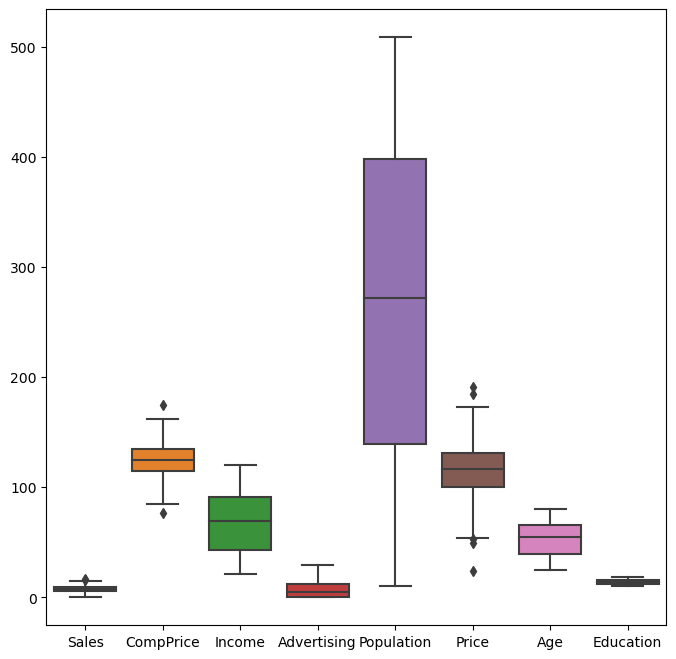

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df)

# Data Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

### Data Type Conversion 

In [17]:
df['ShelveLoc'] = df['ShelveLoc'].astype('category')
df['Urban'] = df['Urban'].astype('category')
df['US'] = df['US'].astype('category')

In [18]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


# Data Visualization

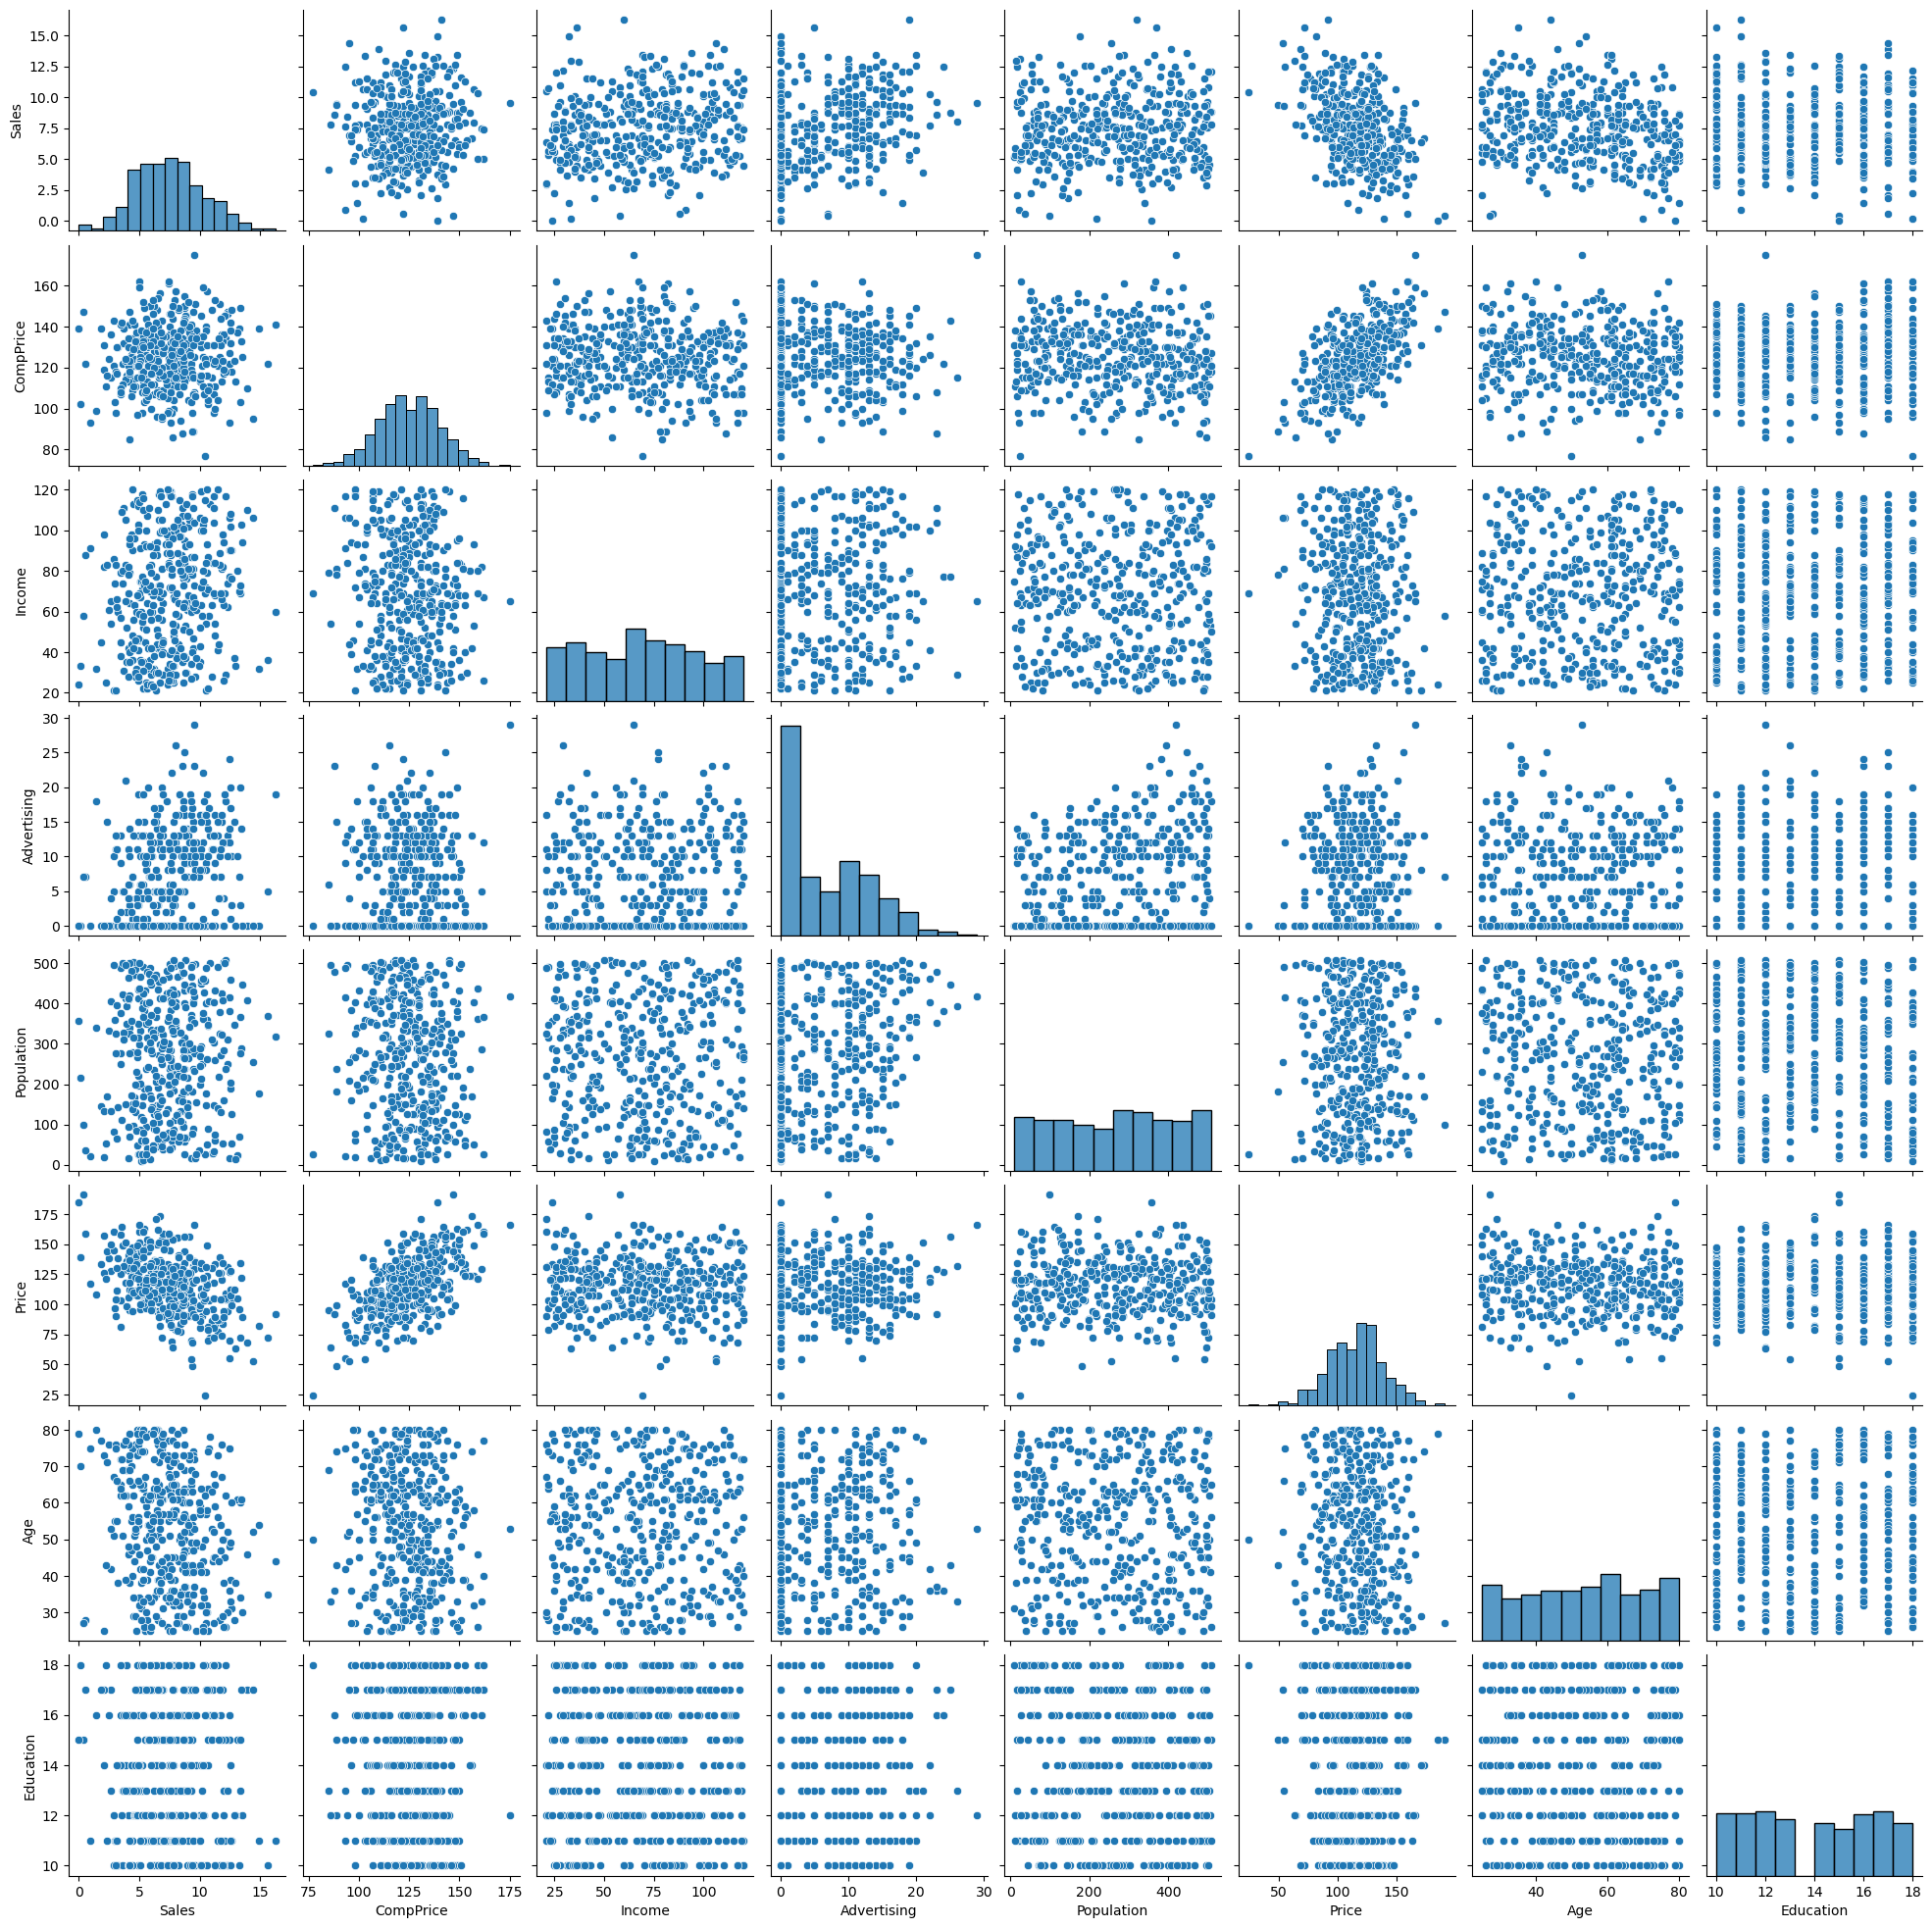

In [20]:
sns.pairplot(df)

<Axes: xlabel='Sales', ylabel='Income'>

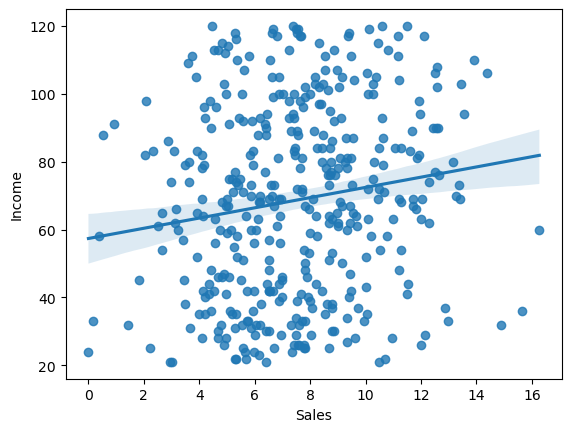

In [21]:
sns.regplot(data=df, x='Sales',y='Income')  

C:\Users\vijay\AppData\Local\Temp\ipykernel_21036\2207781532.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")


<Axes: >

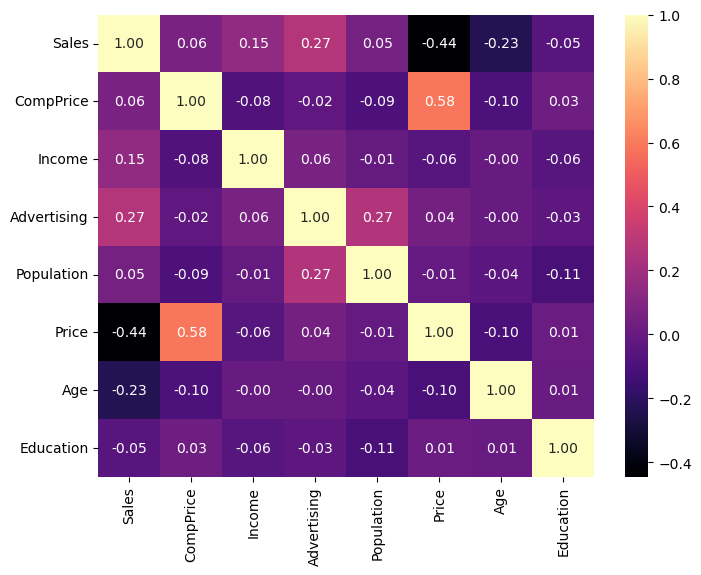

In [22]:
plt.figure(figsize = (8, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: >

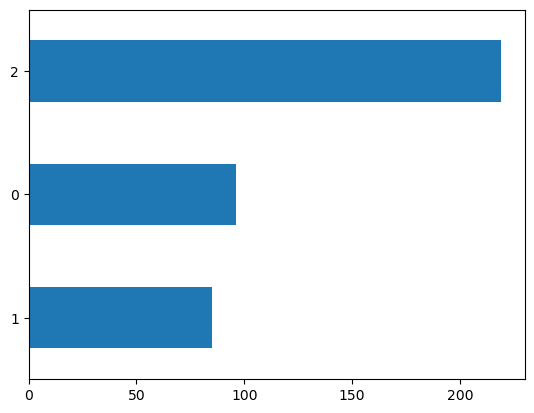

In [23]:
df.ShelveLoc.value_counts(ascending=True).plot(kind='barh')

In [24]:
#
import ppscore as pps
pps.matrix(df) 

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.215000,17.223333,DecisionTreeRegressor()
2,Sales,Income,0.000000,regression,True,mean absolute error,23.632500,30.317083,DecisionTreeRegressor()
3,Sales,Advertising,0.000000,regression,True,mean absolute error,5.730000,6.332500,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.045000,165.681250,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000017,classification,True,weighted F1,0.387407,0.387417,DecisionTreeClassifier()
117,US,Age,0.000000,regression,True,mean absolute error,13.877500,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.285000,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,classification,True,weighted F1,0.600000,0.583031,DecisionTreeClassifier()


In [25]:
pps.score(df, "Sales", "Income")

{'x': 'Sales',
 'y': 'Income',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 23.6325,
 'model_score': 30.317083333333333,
 'model': DecisionTreeRegressor()}

In [26]:
# For continous variable we are going to use Regressor for this dataset

# Data Splitting

In [27]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dtregmodel = DecisionTreeRegressor()

In [31]:
dtregmodel.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
y_pred = dtregmodel.predict(X_test)
y_pred

array([ 4.42,  3.13, 12.85,  5.17,  9.08,  5.16, 11.48,  8.01, 10.62,
       10.98,  5.36,  9.95,  8.68,  7.54,  9.16,  9.34,  8.19, 11.99,
        7.3 ,  5.98,  8.41,  0.16,  7.96,  4.34,  8.32,  7.78,  4.12,
        3.47,  8.77,  4.1 , 12.29, 10.49,  4.95,  5.42, 10.49,  0.16,
        5.99,  6.89,  9.09,  6.15,  3.13,  8.54,  9.64, 10.  , 10.61,
        6.18,  6.59,  7.41,  2.67,  3.67,  8.41,  7.8 ,  5.36, 12.29,
        9.  ,  2.05,  6.92, 12.29, 11.99,  7.02,  7.8 ,  8.43, 11.67,
        5.3 ,  8.31,  9.01,  9.58,  6.43,  5.4 ,  8.77,  6.62,  9.01,
       11.18,  2.05, 11.67, 11.67,  6.92,  7.8 ,  5.87,  7.41])

# Model Evaluation

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.87075
Mean Squared Error (MSE): 6.1856725
Root Mean Squared Error (RMSE): 2.487101224317177
R-squared (R2): 0.37494483265005063


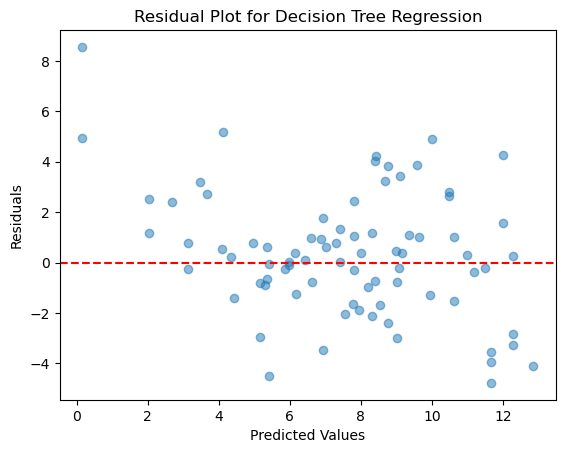

In [35]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regression')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

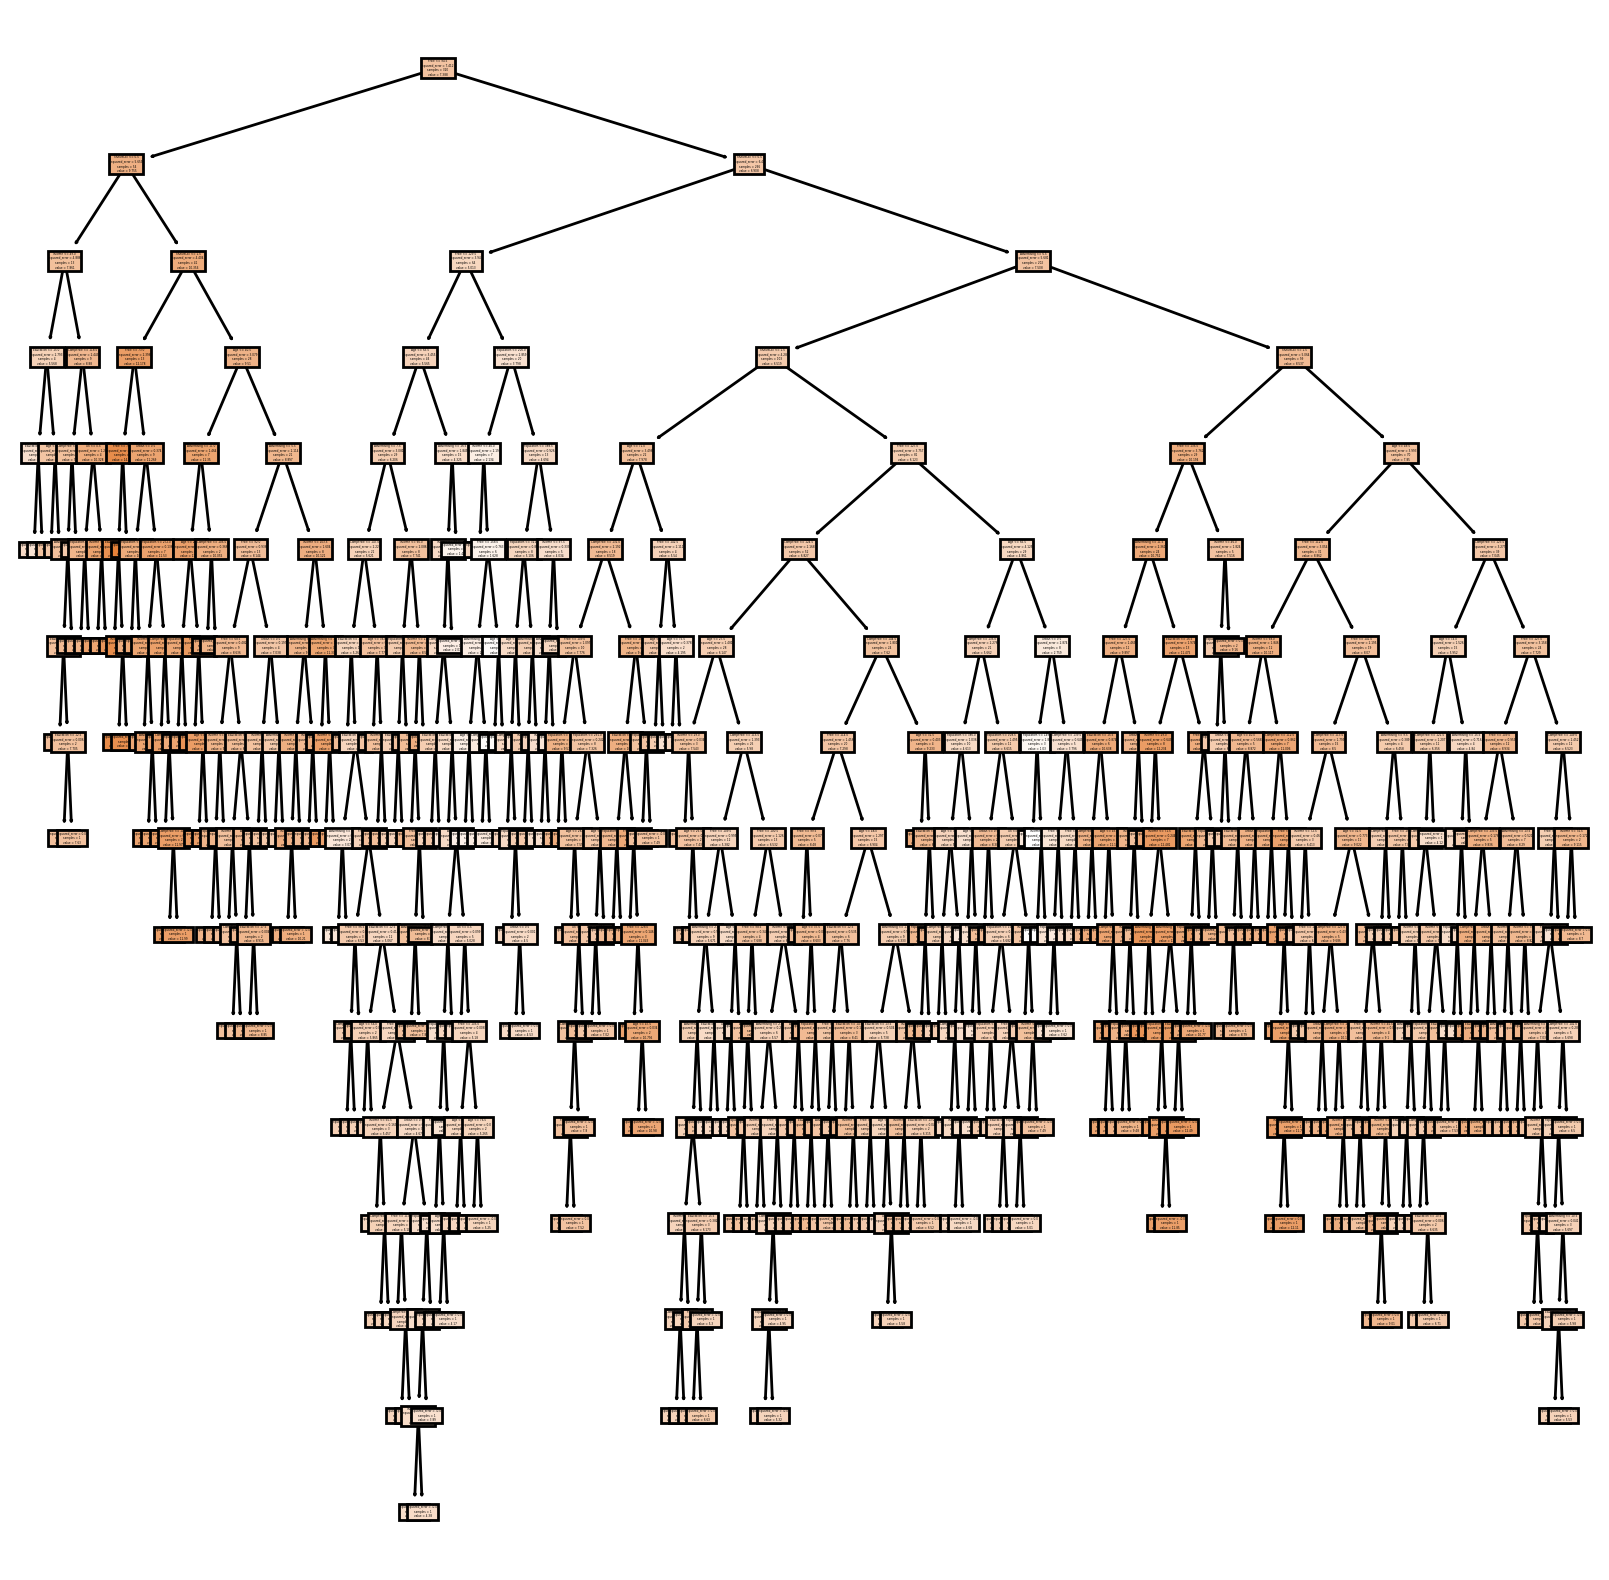

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10),dpi=200)
plot_tree(dtregmodel,filled=True,feature_names=X.columns);

# Cross Validation

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}

In [39]:
grid_model = GridSearchCV(estimator=dtregmodel, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [40]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [41]:
grid_model.best_params_

{'max_depth': 15, 'min_samples_split': 10}

In [42]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_split=10)

In [43]:
grid_pred = grid_model.predict(X_test)

In [44]:
grid_pred

array([ 5.5675    ,  4.034     , 12.23375   ,  4.67142857,  9.2325    ,
        4.67142857, 11.26888889,  8.88      , 10.262     ,  9.44875   ,
        6.33333333,  9.836     ,  8.63555556,  7.54333333,  7.516     ,
        8.63555556,  7.32625   , 11.26888889,  7.76      ,  6.29222222,
       10.12125   ,  2.75875   ,  7.77333333,  4.51333333,  7.74125   ,
        6.33333333,  4.12      ,  5.5675    ,  8.54714286,  3.595     ,
       12.23375   , 10.63833333,  6.01777778,  6.195     , 10.63833333,
        2.75875   ,  7.74125   ,  8.29      ,  9.44875   ,  5.10625   ,
        4.034     ,  8.38      , 10.12125   , 11.26888889,  9.44875   ,
        7.06166667,  5.67111111,  8.63555556,  3.595     ,  2.75875   ,
       10.12125   ,  7.6875    ,  5.67111111, 12.23375   ,  8.54714286,
        2.13428571,  7.06166667, 12.23375   , 11.26888889,  7.32625   ,
        7.32625   ,  9.44875   ,  8.88      ,  5.29166667,  7.76      ,
        8.54714286, 10.262     ,  6.01777778,  5.10625   , 10.63

# Model Evaluation

In [45]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, grid_pred)
mse = mean_squared_error(y_test, grid_pred)
rmse = mean_squared_error(y_test, grid_pred, squared=False)
r2 = r2_score(y_test, grid_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.746192509920635
Mean Squared Error (MSE): 4.728094225819042
Root Mean Squared Error (RMSE): 2.1744181350004976
R-squared (R2): 0.522231458654552


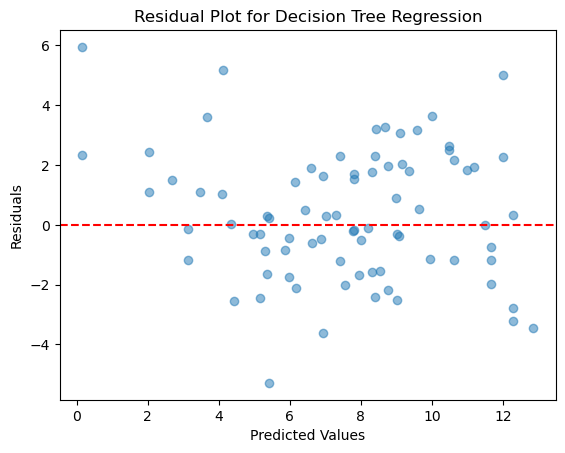

In [46]:
# Calculate residuals
residuals = y_test - grid_pred

# Create a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regression')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [47]:
def run_model(model,X_train,y_train,X_test,y_test):
    #FIT
    model.fit(X_train,y_train)
    
    #PREDICT
    func_pred = model.predict(X_test)
    
    #METRICS
    mae = mean_absolute_error(y_test, func_pred)
    mse = mean_squared_error(y_test, func_pred)
    rmse = np.sqrt(mean_squared_error(y_test,func_pred))
    r2 = r2_score(y_test, grid_pred)
    print(f'MAE : {mae}' )
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'r2 : {r2}')

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

run_model(model, X_train,y_train,X_test,y_test)

MAE : 1.7265508761819206
MSE : 4.379880640052074
RMSE : 2.092816437256759
r2 : 0.522231458654552


In [49]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1,3,5,7,9]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train,y_train,X_test,y_test)

MAE : 2.6891249999999998
MSE : 10.31972875
RMSE : 3.2124334623459516
r2 : 0.522231458654552
MAE : 2.2692916666666667
MSE : 8.072642638888889
RMSE : 2.8412396306698398
r2 : 0.522231458654552
MAE : 2.24585
MSE : 8.1136228
RMSE : 2.848442170731223
r2 : 0.522231458654552
MAE : 2.269482142857143
MSE : 8.644628647959182
RMSE : 2.940174934924652
r2 : 0.522231458654552
MAE : 2.3549861111111112
MSE : 8.93551060185185
RMSE : 2.989232443596826
r2 : 0.522231458654552


In [50]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma':['auto','scale']}

grid = GridSearchCV(svr,param_grid)

run_model(grid, X_train,y_train,X_test,y_test)

MAE : 1.7407698745171103
MSE : 4.5003301259252835
RMSE : 2.1213981535594124
r2 : 0.522231458654552


In [51]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
run_model(model, X_train,y_train,X_test,y_test)

MAE : 1.956
MSE : 6.1446950000000005
RMSE : 2.478849531536757
r2 : 0.522231458654552


# Model Deployment

In [ ]:
# from joblib import dump,load

In [ ]:
# dump(final_model, 'dtregmodel.joblib')

# Target Colummn: Sales

In [52]:
# df['Sales'].describe()

### Converting Numerical Feature into Categorical 

In [53]:
# def Tagging(sale):
#     if sale>= 7.5:
#         return "High"
#     else:
#         return "Low"

In [54]:
# df['Sales']=df['Sales'].apply(Tagging)

In [55]:
# df.head()

### Checking for NAN and Duplicated Values

In [56]:
# df.isna().sum()

In [57]:
# df.duplicated().sum()

### Encoding

In [58]:
# Objectcol=df.select_dtypes(object).columns
# Objectcol

In [59]:
# from sklearn.preprocessing import OrdinalEncoder

# oe = OrdinalEncoder(dtype=int)

# df[Objectcol]=oe.fit_transform(df[Objectcol])

In [60]:
# df.head()

In [61]:
# plt.figure(figsize=(8,5))
# sns.heatmap(df.corr(),annot=True)
# plt.plot()

In [62]:
# sns.pairplot(df,hue='Sales',corner=True)

### Feature Selection

In [63]:
# x=df.drop('Sales',axis=1)
# y=df['Sales']

In [64]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
# from sklearn.preprocessing import StandardScaler
# std=StandardScaler()

# X_train = std.fit_transform(X_train)
# X_test = std.transform(X_test)

## Decision Tree Classifier

In [66]:
# from sklearn.tree import DecisionTreeClassifier

In [67]:
# model = DecisionTreeClassifier()

In [68]:
# model.fit(X_train,y_train)

In [69]:
# y_pred = model.predict(X_test)
# y_pred

### Evaluation

In [70]:
# from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,make_scorer

In [71]:
# sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [72]:
# print(classification_report(y_test,y_pred))

In [73]:
# from sklearn.tree import plot_tree

In [74]:
# plt.figure(figsize=(10,10),dpi=200)
# plot_tree(model,filled=True,feature_names=x.columns);

## Hyper Parameter Tunning

In [75]:
# def report_model(model):
#     model_preds = model.predict(X_test)
#     train_Score=model.score(X_train,y_train)
#     test_Score=model.score(X_test,y_test)
    
#     print(f"train:-{train_Score}\ntest:- {test_Score}")
#     print()
#     print(sns.heatmap(confusion_matrix(y_test,model_preds),annot=True))
#     print(classification_report(y_test,model_preds))
#     print('\n')
#     plt.figure(figsize=(12,8),dpi=150)
#     plot_tree(model,filled=True,feature_names=x.columns);

- The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

- The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

- max_features : int, float or {"auto", "sqrt", "log2"}, default=None The number of features to consider when looking for the best split

In [76]:
# pruned_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
# pruned_tree.fit(X_train,y_train)
# report_model(pruned_tree)

In [77]:
# report_model(pruned_tree)

In [78]:
# from sklearn.model_selection import GridSearchCV

In [79]:
# dtc = DecisionTreeClassifier()
# scorer = make_scorer(accuracy_score)

# param_grid = {'criterion' : ["gini", "entropy"] ,
#               'max_depth': [5,6,7,8,9, 10],
#               'min_samples_split': [2, 5],
#               'min_samples_leaf': [1, 2,3]}


# grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=10,n_jobs=-1,verbose=3)

In [80]:
# grid.fit(X_train,y_train)

In [81]:
# grid.best_estimator_

In [82]:
# report_model(grid.best_estimator_)

In [83]:
# dtc = DecisionTreeClassifier()
# scorer = make_scorer(accuracy_score)

# param_grid = {'criterion' : ["gini", "entropy"] ,
#               'max_leaf_nodes': [5,6,7,8,9, 10],
#               'min_samples_split': [2, 5]}


# grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=5,n_jobs=-1,verbose=3)

In [84]:
# grid.fit(X_train,y_train)

In [85]:
# grid.best_estimator_

In [86]:
# report_model(grid.best_estimator_)